In [1]:
import numpy as np 
from TensorDecisionTreeRegressor import *
#Debugging import
import importlib
var = 'TensorDecisionTreeRegressor'
package = importlib.import_module(var)
for name, value in package.__dict__.items():
    if not name.startswith("__"):
        globals()[name] = value

In [3]:
y

array([ 0.,  0.,  0., -0., -3., -0.,  0., -3., -3.,  5., -3.,  5.,  0.,
        0., -3., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  0.,
       -3.,  0., -3.,  0.,  0.,  0., -0.,  0.,  0., -3.,  0., -3.,  0.,
        0.,  0., -3., -3., -3., -3.,  5., -3.,  0., -3., -3., -3., -0.,
        0., -3., -3., -3.,  0., -3.,  0., -3.,  0., -3.,  0., -3., -3.,
        0.,  0., -3., -3.,  0.])

In [21]:
# Test
np.random.seed(123)
# Prepare dummy tensor data
X = np.random.uniform(size=(700,5,10))
y = np.sin(X[:,0,2]) + np.cos(2*X[:,1,3])*3
y = y*0.
for i in range(len(y)):
    if X[i,0,2]>.21:
        if X[i,1,3]<0.67:
            y[i] = -5
        else:
            y[i] = -3
    else:
        y[i] = 5
# Initialize and fit the model
model = TensorDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='variance', n_mode=3)
model.use_mean_as_threshold = False
model.sample_rate = 1
#model = TensorDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='variance')
#MSE: 0.11382411689847534
#model = TensorDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='cluster')
#MSE: 1.6217618723061886
#model = TensorDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='kmeans',rank=3)
model.fit(X,y)
print('MSE:',np.mean((model.predict(X,'mean')-y)**2) )
model.print_tree()

/home/hrluo/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hrluo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/hrluo/.local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


search size: 50
(0, 2) 0.20886000530346394 488.3093525179856
search size: 50
(0, 0) 0.0009137343794487496 0.0
search size: 50
(0, 0) 0.003064752259981929 0.0
search size: 50
(1, 3) 0.6669730934818225 0.0
search size: 50
(0, 0) 0.0009411295051650059 0.0
search size: 50
(0, 0) 0.0007679744213585638 0.0
MSE: 0.0
  if X[:, 0 , 2 ] <=  0.20886000530346394
   if X[:, 0 , 0 ] <=  0.0009137343794487496
     has  0  child nodes, and  1  samples.
   else: # if X[:, 0 , 0 ] >  0.0009137343794487496
     if X[:, 0 , 0 ] <=  0.003064752259981929
         has  0  child nodes, and  1  samples.
     else: # if X[:, 0 , 0 ] >  0.003064752259981929
         has  0  child nodes, and  142  samples.
  else: # if X[:, 0 , 2 ] >  0.20886000530346394
   if X[:, 1 , 3 ] <=  0.6669730934818225
     if X[:, 0 , 0 ] <=  0.0009411295051650059
         has  0  child nodes, and  1  samples.
     else: # if X[:, 0 , 0 ] >  0.0009411295051650059
         has  0  child nodes, and  374  samples.
   else: # if X[:, 1 , 3

In [3]:
n_samples = 200
n_x = 10 
n_y = 12
n_z = 7
my_tensor2 = np.random.normal(size=(n_samples,n_x,n_y,n_z))#my_tensor.reshape(147, 1, 4, 70)
my_tensor2new = np.random.normal(size=(n_samples*2,n_x,n_y,n_z))#my_tensor.reshape(147, 1, 4, 70)

my_scalar2 = np.sin(my_tensor2[:,1,4,3]) + 0.01*np.random.normal(size=(n_samples,))#my_scalar.reshape(-1,1)
my_scalar2new = np.sin(my_tensor2new[:,1,4,3]) + 0.01*np.random.normal(size=(n_samples*2,)) 
model2 = TensorDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='lowrank_LS',split_rank=2,n_mode=4)
model2.fit(my_tensor2,my_scalar2)
y_test_pred = model2.predict(my_tensor2new)
mse_test = L2_norm(my_scalar2new, y_test_pred)
print("-"*100)
print("Test MSE before pruning:", mse_test)
print('Depth before pruning:',model2.get_depth())
print('#Leaves before pruning:',model2.count_leaves())
model2.print_tree()

model2.prune(my_tensor2,my_scalar2,'cp',0.)
y_test_pred = model2.predict(my_tensor2new)
mse_test = L2_norm(my_scalar2new, y_test_pred)
print("-"*100)
print("Test MSE after pruning:", mse_test)
print('Depth after pruning:',model2.get_depth())
print('#Leaves after pruning:',model2.count_leaves())
model2.print_tree()


search size: 8
(8, 6, 2) 0.061390427023991584 576.8586826315145
search size: 8
(6, 2, 4) -0.019789855535234633 420.04982716322235
search size: 8
(5, 6, 5) -0.031107308772096203 311.619757669195
search size: 8
(5, 2, 4) -0.023024221594984205 279.1082028316862
search size: 8
(0, 0, 1) 0.0407047690317761 392.0631980696452
search size: 8
(9, 4, 2) 0.15567102973990404 246.90986886586506
search size: 8
(3, 9, 6) 0.1987564842258187 305.0702887122379
----------------------------------------------------------------------------------------------------
Test MSE before pruning: 13.648869075997773
Depth before pruning: 3
#Leaves before pruning: 8
  if X[:, 8 , 6 , 2 ] <=  0.061390427023991584
   if X[:, 6 , 2 , 4 ] <=  -0.019789855535234633
     if X[:, 5 , 6 , 5 ] <=  -0.031107308772096203
         has  0  child nodes, and  33  samples.
     else: # if X[:, 5 , 6 , 5 ] >  -0.031107308772096203
         has  0  child nodes, and  26  samples.
   else: # if X[:, 6 , 2 , 4 ] >  -0.019789855535234633
 

### Experiment 1: Image separation

(3000, 25, 25) (3000,)


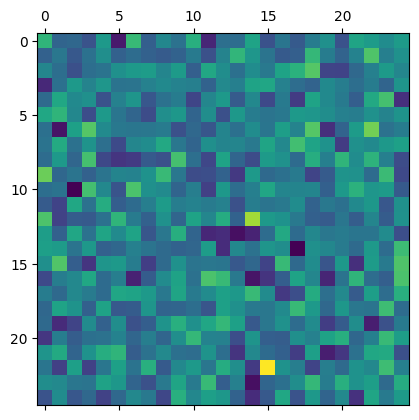

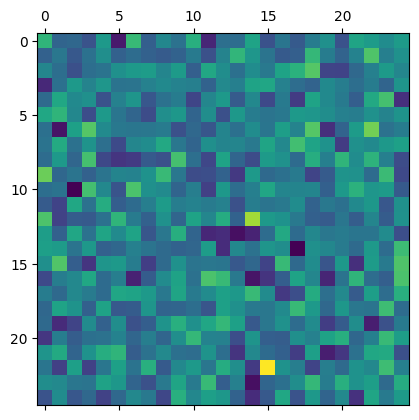

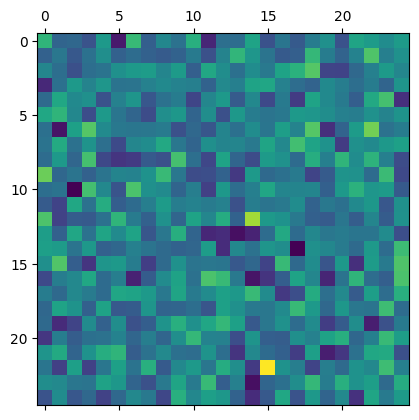

In [4]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.regression.cp_regression import CPRegressor
import tensorly as tl

# Parameter of the experiment
image_height = 25
image_width = 25
# Generate random samples: 3-class mixture swiss+circle+rectangle with different X locations

rng = tl.check_random_state(1)
X1 = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=1, scale=.1))
# Generate the original image
weight_img = gen_image(region='swiss', image_height=image_height, image_width=image_width)
weight_img = tl.tensor(weight_img)
# Generate the labels
y1 = tl.dot(partial_tensor_to_vec(X1, skip_begin=1), tensor_to_vec(weight_img))
plt.matshow(X1[0,:,:])

rng = tl.check_random_state(1)
X2 = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=-1, scale=.1))
# Generate the original image
weight_img = gen_image(region='circle', image_height=image_height, image_width=image_width)
weight_img = tl.tensor(weight_img)
# Generate the labels
y2 = tl.dot(partial_tensor_to_vec(X2, skip_begin=1), tensor_to_vec(weight_img))
plt.matshow(X2[0,:,:])

rng = tl.check_random_state(1)
X3 = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=.1))
# Generate the original image
weight_img = gen_image(region='rectangle', image_height=image_height, image_width=image_width)
weight_img = tl.tensor(weight_img)
# Generate the labels
y3 = tl.dot(partial_tensor_to_vec(X3, skip_begin=1), tensor_to_vec(weight_img))
plt.matshow(X3[0,:,:])

X = tl.concatenate((X1,X2,X3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
print(X.shape,y.shape)

  has  0  child nodes, and  3000  samples.
max_depth= 0


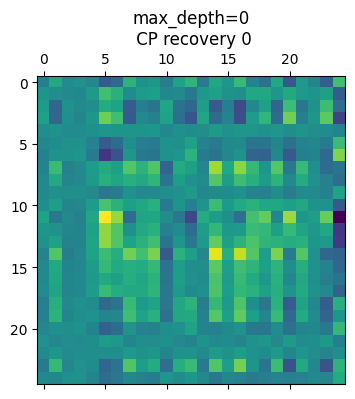

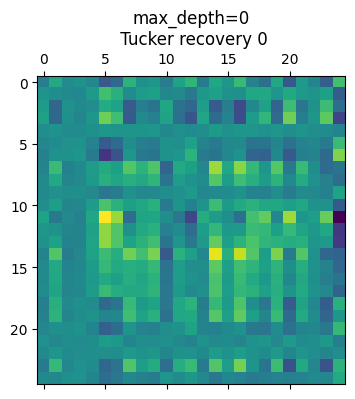

max_depth=0 CP MSE=72.44927759511208
max_depth=0 Tucker MSE=72.44921777487089
search size: 625
(7, 13) 0.002762466571806404 18842.946563793826
  if X[:, 7 , 13 ] <=  0.002762466571806404
   has  0  child nodes, and  1527  samples.
  else: # if X[:, 7 , 13 ] >  0.002762466571806404
   has  0  child nodes, and  1473  samples.
max_depth= 1


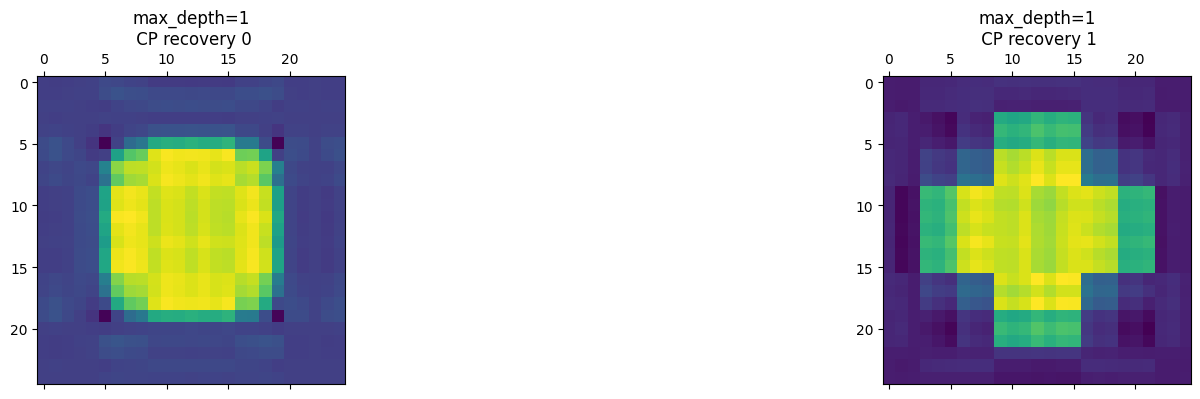

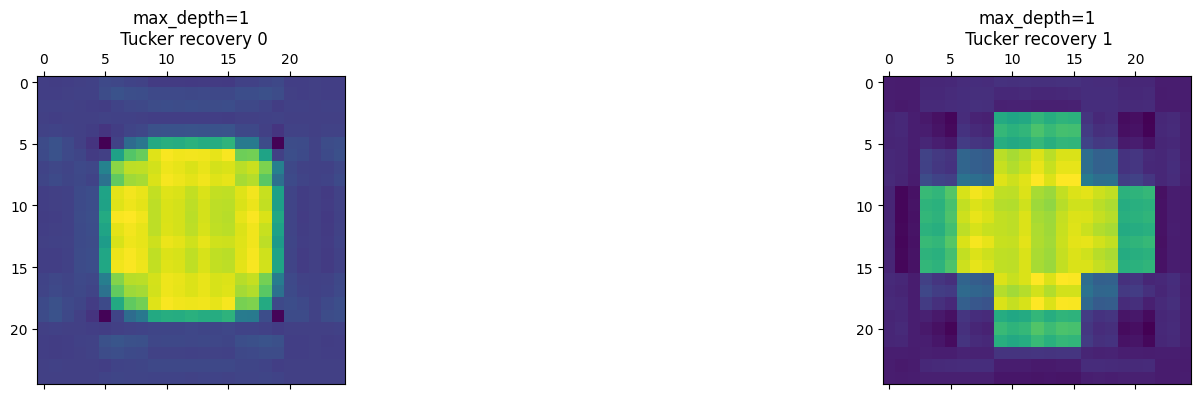

max_depth=1 CP MSE=0.18724255668142875
max_depth=1 Tucker MSE=0.18697854194617783
search size: 625
(7, 13) 0.002762466571806404 18842.946563793826
search size: 625
(0, 0) -0.6578771189704321 3.7010249124785872
search size: 625
(0, 3) 0.6819905854723021 3.9961336060930797
  if X[:, 7 , 13 ] <=  0.002762466571806404
   if X[:, 0 , 0 ] <=  -0.6578771189704321
     has  0  child nodes, and  1000  samples.
   else: # if X[:, 0 , 0 ] >  -0.6578771189704321
     has  0  child nodes, and  527  samples.
  else: # if X[:, 7 , 13 ] >  0.002762466571806404
   if X[:, 0 , 3 ] <=  0.6819905854723021
     has  0  child nodes, and  473  samples.
   else: # if X[:, 0 , 3 ] >  0.6819905854723021
     has  0  child nodes, and  1000  samples.
max_depth= 2


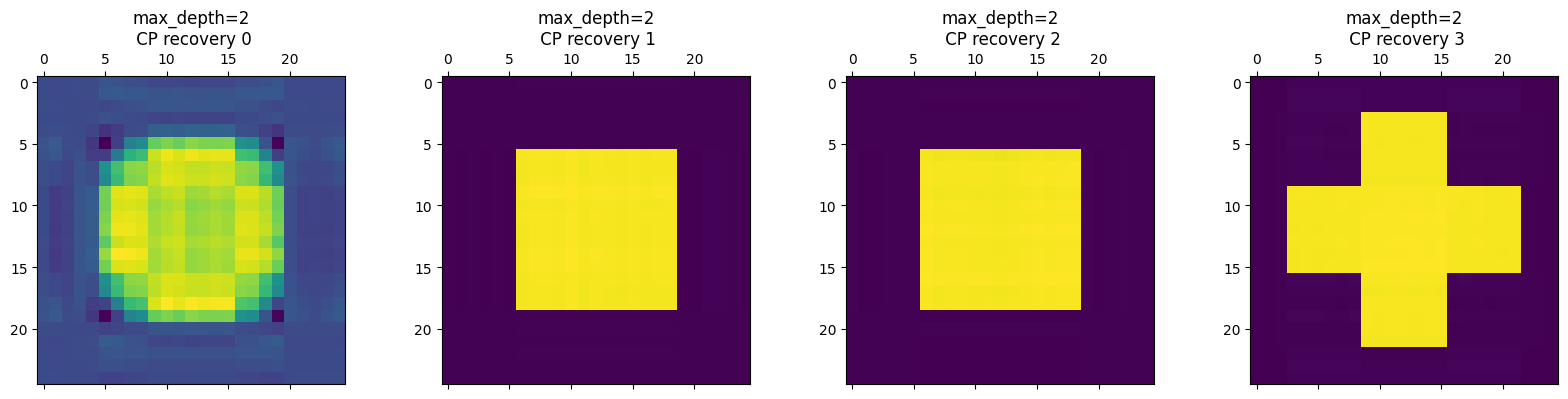

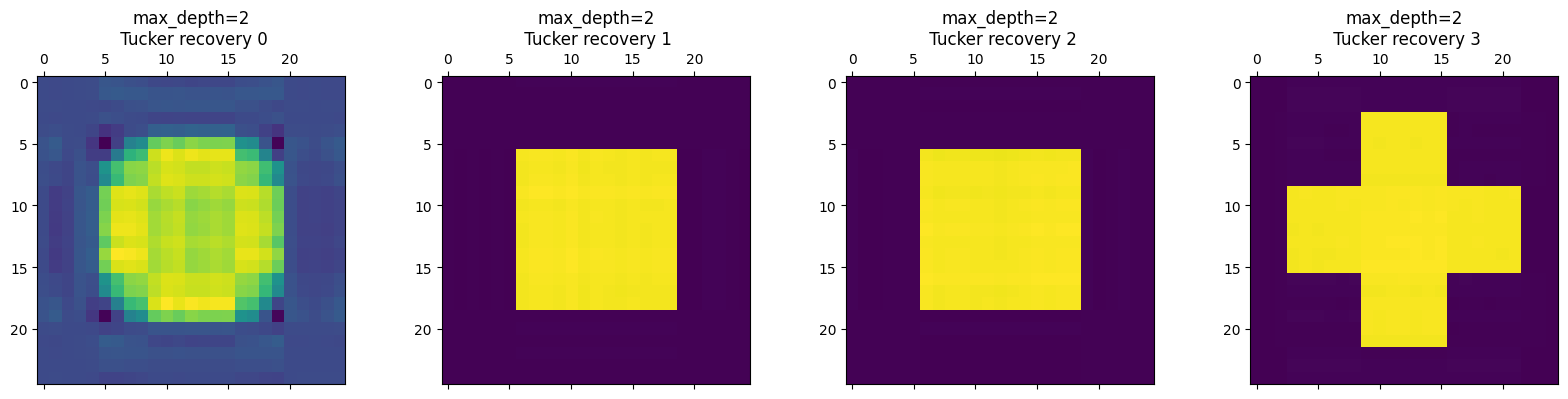

max_depth=2 CP MSE=0.02437814515664115
max_depth=2 Tucker MSE=0.023908044464962103
search size: 625
(7, 13) 0.002762466571806404 18842.946563793826
search size: 625
(0, 0) -0.6578771189704321 3.7010249124785872
search size: 625
(12, 16) -0.9988087201495778 3.9229270200287303
search size: 625
(15, 15) 0.0012511591944433446 3.283208313561697
search size: 625
(0, 3) 0.6819905854723021 3.9961336060930797
search size: 625
(12, 13) 0.00036509544581891896 3.3507124769421033
search size: 625
(15, 15) 0.9986587460048963 4.423405931288685
  if X[:, 7 , 13 ] <=  0.002762466571806404
   if X[:, 0 , 0 ] <=  -0.6578771189704321
     if X[:, 12 , 16 ] <=  -0.9988087201495778
         has  0  child nodes, and  511  samples.
     else: # if X[:, 12 , 16 ] >  -0.9988087201495778
         has  0  child nodes, and  489  samples.
   else: # if X[:, 0 , 0 ] >  -0.6578771189704321
     if X[:, 15 , 15 ] <=  0.0012511591944433446
         has  0  child nodes, and  267  samples.
     else: # if X[:, 15 , 15 ] 

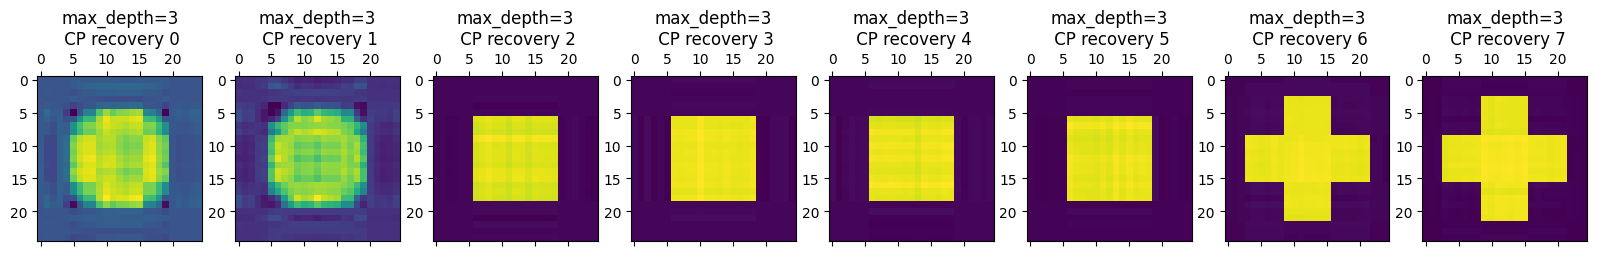

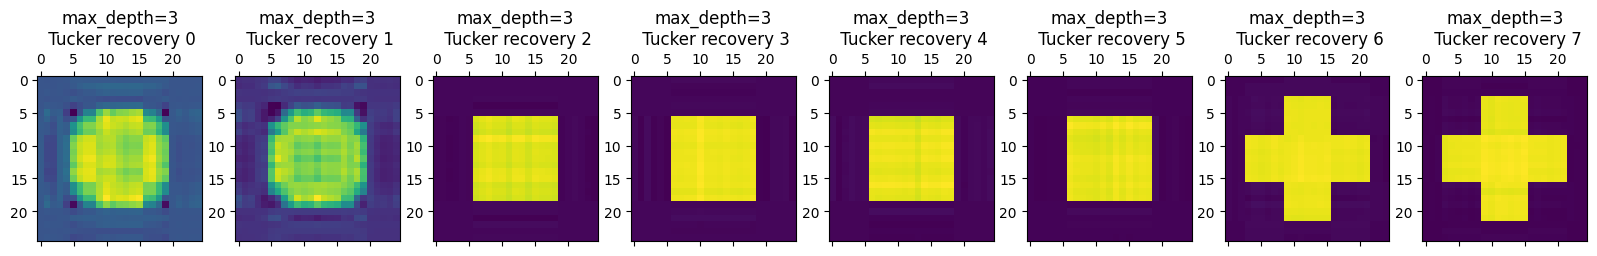

max_depth=3 CP MSE=0.022701806331600665
max_depth=3 Tucker MSE=0.021608589449269227


In [5]:
#model.get_design_matrix()
#model.get_fitted_coefs()
for md in [0,1,2,3]:
    model = TensorDecisionTreeRegressor(max_depth=md, min_samples_split=2, split_method='variance',split_rank=2,n_mode=3)
    model.sample_rate = 0.01
    model.fit(X,y)
    model.print_tree()
    print('max_depth=',md)
    n_leaf = len(model._get_leaf_samples_count(model.root))
    #print('CP complexity=',C_alpha_tl(model,'cp',0))
    #print('Tucker complexity=',C_alpha_tl(model,'tucker',0))

    ml1 = model.get_fitted_coefs()
    coef_sum_cp = np.zeros(ml1[0][0].shape)
    coef_sum_tucker = np.zeros(ml1[0][0].shape)
    #print(n_leaf)

    fig, axes = plt.subplots(1, n_leaf,figsize=(20, 4))

    ct1 = 0
    for m in ml1:
        #print(m[0].shape)
        coef_sum_cp = coef_sum_cp + m[0]#mat1[ct1,ct1]
        if n_leaf==1:
            axes.matshow(m[0])
            axes.set_title('max_depth='+str(md)+'\n CP recovery '+str(ct1))
        else:
            axes[ct1].matshow(m[0])
            axes[ct1].set_title('max_depth='+str(md)+'\n CP recovery '+str(ct1))
        ct1 = ct1 + 1
    plt.show()

    fig, axes = plt.subplots(1, n_leaf,figsize=(20, 4))
    ct1 = 0
    for m in ml1:
        coef_sum_tucker = coef_sum_tucker + m[1]#*mat1[ct1,ct1]
        if n_leaf==1:
            axes.matshow(m[0])
            axes.set_title('max_depth='+str(md)+'\n Tucker recovery '+str(ct1))
        else:
            axes[ct1].matshow(m[0])
            axes[ct1].set_title('max_depth='+str(md)+'\n Tucker recovery '+str(ct1))
        ct1 = ct1 + 1
    plt.show()

    sum1 = ct1#sum(sum(mat1))
    #plt.matshow(coef_sum_cp/sum1)
    cp_mse = np.mean((y-model.predict(X,regression_method='cp'))**2)
    print('max_depth='+str(md)+' CP MSE='+str(cp_mse))
    #plt.title('max_depth='+str(md)+' CP MSE='+str(cp_mse))
    #plt.matshow(coef_sum_tucker/sum1)
    tucker_mse = np.mean((y-model.predict(X,regression_method='tucker'))**2)
    print('max_depth='+str(md)+' Tucker MSE='+str(tucker_mse))
    #plt.title('max_depth='+str(md)+' Tucker MSE='+str(tucker_mse))
    #plt.show()


### Experiment 2: Complexities

search size: 20
(3, 3) -0.015574840396882091 78.47859560253161
search size: 20
(3, 3) -0.015574840396882091 78.47859560253161
search size: 20
(3, 0) -0.021847082431301793 75.45054580522671
search size: 20
(3, 0) -0.021847082431301793 75.45054580522671
search size: 20
(3, 0) -0.021847082431301793 72.63914869006675
search size: 20
(3, 0) -0.021847082431301793 72.63914869006675
search size: 20
(3, 0) -0.021847082431301793 69.8634384941337
search size: 20
(3, 0) -0.021847082431301793 69.8634384941337
search size: 20
(3, 0) -0.021847082431301793 66.88703278656324
search size: 20
(0, 0) -0.02428690266261271 66.89464280879044
search size: 20
(3, 3) -0.015574840396882091 78.47859560253161
search size: 20
(1, 3) -0.0015533923539301703 55.44533283999694
search size: 20
(2, 3) 0.03470537192331117 53.89121575953562


/home/hrluo/.local/lib/python3.10/site-packages/tensorly/regression/tucker_regression.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  weight_evolution = abs(norm_W[-1] - norm_W[-2]) / norm_W[-1]
/home/hrluo/.local/lib/python3.10/site-packages/tensorly/regression/tucker_regression.py:126: RuntimeWarning: invalid value encountered in double_scalars
  weight_evolution = abs(norm_W[-1] - norm_W[-2]) / norm_W[-1]


search size: 20
(3, 3) -0.015574840396882091 78.47859560253161
search size: 20
(1, 3) -0.0015533923539301703 55.44533283999694
search size: 20
(2, 3) 0.03470537192331117 53.89121575953562
search size: 20
(3, 0) -0.021847082431301793 75.45054580522671
search size: 20
(3, 1) 0.01074815285743157 51.789063351817475
search size: 20
(1, 0) 0.008233171576160346 52.805548036673265
search size: 20
(3, 0) -0.021847082431301793 75.45054580522671
search size: 20
(3, 1) 0.01074815285743157 51.789063351817475
search size: 20
(1, 0) 0.008233171576160346 52.805548036673265
search size: 20
(3, 0) -0.021847082431301793 72.63914869006675
search size: 20
(3, 1) 0.01074815285743157 49.498645890237874
search size: 20
(1, 0) 0.008233171576160346 50.53571987367895
search size: 20
(3, 0) -0.021847082431301793 72.63914869006675
search size: 20
(3, 1) 0.01074815285743157 49.498645890237874
search size: 20
(1, 0) 0.008233171576160346 50.53571987367895
search size: 20
(3, 0) -0.021847082431301793 69.8634384941337


findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


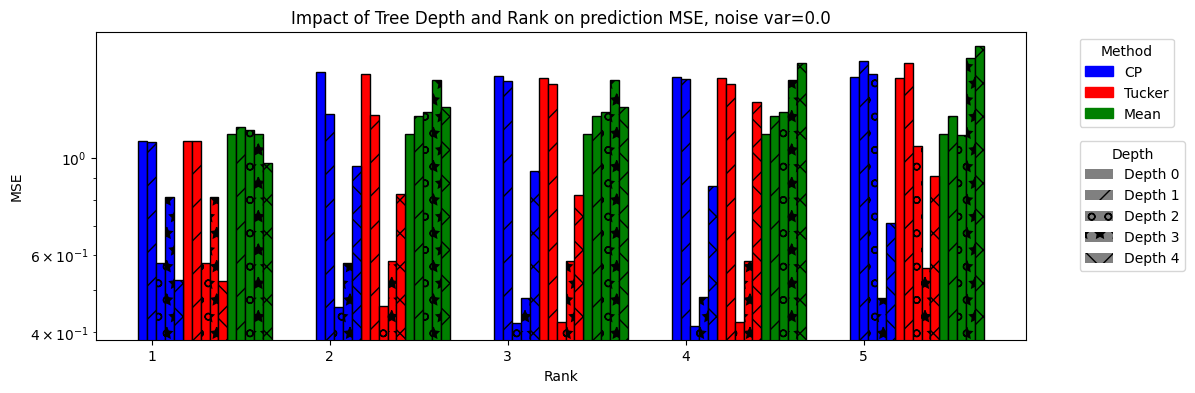

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming X and y are already defined
# Assuming TensorDecisionTreeRegressor is already imported
# Assuming C_alpha is already defined

ranks = [1, 2, 3, 4, 5]
depths = [0, 1, 2, 3, 4]
bar_width = 0.05
colors = ['b', 'r', 'g']
methods = ['CP', 'Tucker', 'Mean']
hatches = ['', '/', 'o', '*','x']

fig, ax = plt.subplots(figsize=(12, 4))
#Signal
def func(X):
    return 2*X[:, 0, 1]*X[:, 2, 3] + 3*X[:, 1, 0] * X[:,2, 0] * X[:,3, 0] #CP form
    #return X[:, 0, 1] * X[:, 2, 3] * X[:, 1, 1] #Tucker form
    #return X[:, 0, 1] * X[:, 0, 2] * X[:, 1, 1] *X[:,1, 2] #exotic

# Prepare matrix dummy data with noise
np.random.seed(42)
N = 500
noise_var = 0.0#0.2**2
X = np.random.uniform(size=(N,5,4),low=-1,high=1)
y = func(X)
y = y + np.random.normal(size=y.shape,scale=np.sqrt(noise_var))

for i, depth in enumerate(depths):
    MSE_mean = []
    MSE_cp = []
    MSE_tucker = []
    for my_rank in ranks:
        model = TensorDecisionTreeRegressor(max_depth=depth, min_samples_split=2, split_method='lowrank', split_rank=my_rank,n_mode=3)
        model.sample_rate = 1.0
        model.fit(X, y)

        np.random.seed(123)
        X_test = np.random.uniform(size=X.shape)
        y_test = func(X_test)
        y_test = y_test + np.random.normal(size=y.shape,scale=np.sqrt(noise_var))

        predictions = model.predict(X_test, regression_method='mean')
        MSE_mean.append(np.mean((y_test - predictions) ** 2))


        #model = TensorDecisionTreeRegressor(max_depth=depth, min_samples_split=2, split_method='lowrank', rank=my_rank)
        model.fit(X, y)

        predictions = model.predict(X_test, regression_method='cp')
        MSE_cp.append(np.mean((y_test - predictions) ** 2))

        predictions = model.predict(X_test, regression_method='tucker')
        MSE_tucker.append(np.mean((y_test - predictions) ** 2))

    r = np.asarray(ranks).squeeze()#np.arange(len(ranks))
    ax.bar(r + bar_width * i, MSE_cp, color=colors[0], hatch=hatches[i], width=bar_width, edgecolor='black')
    ax.bar(r + bar_width * (i + len(depths)), MSE_tucker, color=colors[1], hatch=hatches[i], width=bar_width, edgecolor='black')
    ax.bar(r + bar_width * (i + 2 * len(depths)), MSE_mean, color=colors[2], hatch=hatches[i], width=bar_width, edgecolor='black')

plt.xlabel('Rank')
plt.ylabel('MSE')
plt.yscale('log')
plt.title('Impact of Tree Depth and Rank on prediction MSE, noise var='+str(np.round(noise_var,2) ) )
plt.xticks(r + bar_width, ranks)

# Creating legends for methods and depths
legend1 = [mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)]
legend2 = [mpatches.Patch(facecolor='gray', hatch=hatch, label=f'Depth {depth}') for hatch, depth in zip(hatches, depths)]
#plt.legend(handles=legend1, loc='upper left', bbox_to_anchor=(1.05, 0.75))
#plt.legend(handles=legend2, loc='upper left', bbox_to_anchor=(1.05, 0.25))
legend1 = plt.legend(handles=legend1, loc='upper left', bbox_to_anchor=(1.05, 1), title="Method")
plt.gca().add_artist(legend1)  # Adding the first legend as an artist
legend2 = plt.legend(handles=legend2, loc='lower left', bbox_to_anchor=(1.05, 0.2), title="Depth")

plt.show()


### Experiment 3: Realize the matrix-input model as special case of tensor-input model

In [7]:
from sklearn.linear_model import LinearRegression
class MatrixDecisionTreeRegressor(TensorDecisionTreeRegressor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.modeltype = 'MatrixDecisionTreeRegressor'

    def _rank_k_approx_error(self, X, method='svd'):
        if method == 'svd':
            U, s, Vh = np.linalg.svd(X, full_matrices=False)
            rank_k_approx = np.dot(U[:, :self.split_rank] * s[:self.split_rank], Vh[:self.split_rank, :])
            return np.linalg.norm(X - rank_k_approx)
        else:
            raise ValueError("Invalid method for matrix rank-k approximation. Expected 'svd'.")

    def _build_tree(self, X, y, depth=0):
        # Reuse the _build_tree method but fit a linear regressor at the leaf nodes
        if len(y) >= self.min_samples_split and depth < self.max_depth:
            feature_index, threshold, loss = self._get_best_split(X, y)
            if feature_index is not None or threshold is not None:
                splits = self._split(X, y, feature_index, threshold)
                node = Node(predicted_value=np.nan, samples_X=X, samples_y=y, leaf_index=self.leaf_counter)
                node.root = self.root
                node.split_loss = loss
                node.feature_index = feature_index
                node.threshold = threshold
                node.left = self._build_tree(X[splits[0]], y[splits[0]], depth+1)
                node.right = self._build_tree(X[splits[1]], y[splits[1]], depth+1)
                return node
        else:
            linear_model = LinearRegression().fit(X, y)
            return Node(predicted_value=np.mean(y), samples_X=X, samples_y=y, linear_model=linear_model, leaf_index=self.leaf_counter)
        
    def _traverse_tree(self, x, node):
        if node.left is None and node.right is None:
            return node.predicted_value
        if self.split_method in ['variance', 'lowrank']:
            if x[node.feature_index] <= node.threshold:
                return self._traverse_tree(x, node.left)
            else:
                return self._traverse_tree(x, node.right)
        else:
            raise ValueError("Invalid split method for matrices. Expected 'variance'.")

    def _traverse_tree_with_regression(self, x, node):
        if node is None:
            return np.nan
        if (node.left is None and node.right is None) or (node.samples_X.shape[0] < self.min_samples_split):
            if node.linear_model is not None:
                return node.linear_model.predict(x.reshape(1, -1))[0]
            print('No linear_model trained, using average value as prediction.')
            return node.predicted_value
        if self.split_method in ['variance', 'lowrank']:
            if x[node.feature_index] <= node.threshold:
                return self._traverse_tree_with_regression(x, node.left)
            else:
                return self._traverse_tree_with_regression(x, node.right)
        if self.split_method=='kmeans':
            labels = self.classifier.predict([x])
            if labels == 0:
                return self._traverse_tree_with_regression(x, node.left)
            else:
                return self._traverse_tree_with_regression(x, node.right)

    def predict(self, X, regression_method='linear'):
        if regression_method == 'mean':
            return np.array([self._traverse_tree(x, self.root) for x in X])
        elif regression_method == 'linear':
            return np.array([self._traverse_tree_with_regression(x, self.root) for x in X])
        else:
            raise ValueError("Invalid regression method. Expected 'mean' or 'linear'.")
        
    def _split(self, X, y, feature_index, threshold):
        if self.split_method in ['variance', 'lowrank']:
            less_equal_than_threshold = X[:, feature_index] <= threshold
            greater_than_threshold = ~less_equal_than_threshold
            return less_equal_than_threshold, greater_than_threshold
        
        # Similar to before, we'll skip the 'lowrank' and 'kmeans' methods for simplicity.
        else:
            raise ValueError("Invalid split method for matrices. Expected 'variance' or 'lowrank'.")

    def _get_best_split(self, X, y):
        if self.split_method == 'variance':
            best_var = float('inf')
            best_feature_index = None
            best_threshold = None
            for feature_index in range(X.shape[1]):
                threshold = np.mean(X[:, feature_index])
                splits = self._split(X, y, feature_index, threshold)
                var = sum([len(y[split]) * np.var(y[split]) for split in splits])
                if var < best_var:
                    best_var = var
                    best_feature_index = feature_index
                    best_threshold = threshold
            return best_feature_index, best_threshold, best_var
        elif self.split_method == 'lowrank':
            best_err = float('inf')
            best_feature_index = None
            best_threshold = None
            for feature_index in range(X.shape[1]):
                threshold = np.mean(X[:, feature_index])
                splits = self._split(X, y, feature_index, threshold)
                err = sum([self._rank_k_approx_error(X[split]) for split in splits])
                if err < best_err:
                    best_err = err
                    best_feature_index = feature_index
                    best_threshold = threshold
            return best_feature_index, best_threshold, best_err
        # We'll skip the 'lowrank' and 'kmeans' split methods for simplicity now.
        # They require more extensive modifications to work with matrices.
        else:
            raise ValueError("Invalid split method for matrices. Expected 'variance' or 'lowrank'.")
        
    def print_tree(self, node=None, indent=" "):
        if node is None:
            node = self.root
            
        if self.split_method in ['variance', 'lowrank']:
            if node.left is not None:
                print(indent, f"if X[:, {node.feature_index}] <= {node.threshold}")
                self.print_tree(node.left, indent + indent)
                print(indent, f"else: # if X[:, {node.feature_index}] > {node.threshold}")
                self.print_tree(node.right, indent + indent)
            else:
                print(indent, f"has {node.count_child()} child nodes, and {node.samples_X.shape[0]} samples.")
        else:
            raise ValueError("Invalid split method for matrices. Expected 'variance' or 'lowrank'.")


In [8]:
# Generating some mock data
X = np.random.rand(1000, 2)
y = X[:, 0] + 2 * X[:, 1] + np.random.randn(1000) * 0.1  # Simple linear relation with some noise

# Using MatrixDecisionTreeRegressor
regressor = MatrixDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='lowrank', split_rank=1, n_mode=2)
regressor.fit(X, y)
predictions = regressor.predict(X, regression_method='mean')
regressor.print_tree()
print(predictions)  # printing first 5 predictions

  if X[:, 1] <= 0.5085157346881947
   if X[:, 1] <= 0.25782332623395515
     if X[:, 1] <= 0.12625554276076445
         has 0 child nodes, and 123 samples.
     else: # if X[:, 1] > 0.12625554276076445
         has 0 child nodes, and 125 samples.
   else: # if X[:, 1] > 0.25782332623395515
     if X[:, 0] <= 0.5649412714668545
         has 0 child nodes, and 113 samples.
     else: # if X[:, 0] > 0.5649412714668545
         has 0 child nodes, and 130 samples.
  else: # if X[:, 1] > 0.5085157346881947
   if X[:, 0] <= 0.5106926986269577
     if X[:, 0] <= 0.26914315026715474
         has 0 child nodes, and 133 samples.
     else: # if X[:, 0] > 0.26914315026715474
         has 0 child nodes, and 125 samples.
   else: # if X[:, 0] > 0.5106926986269577
     if X[:, 1] <= 0.764879404408368
         has 0 child nodes, and 125 samples.
     else: # if X[:, 1] > 0.764879404408368
         has 0 child nodes, and 126 samples.
[2.53054011 0.90206071 1.57615326 1.08294473 1.08294473 0.90206071
 0